<a href="https://colab.research.google.com/github/Davidboga4/FaceRecognition/blob/master/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

We'll be using [Boston Housing Dataset](https://scikit-learn.org/stable/datasets/index.html#boston-dataset) for this example


Scikit learn has `Transformers` and `Estimators`

## Estimators
Estimators are basically ML algorithms.
*  They have a `fit` method that fits the estimator on the given dataset
*  They also have a `predict` method that makes predictions for the given data by the estimator

## Transformers
Transformers modify the datasets. <br>
Eg: StandardScaler`[Scales the dataset to have 0 mean and 1 std]`, OneHotEncoder`[Encodes the target classes into a one hot vector]`, PolynomialFeatures`[Generates polynomial features for our inputs]`, etc.,
*  They have `fit` method in which the transformer collects the necessary information it needs from the dataset to apply transformations
*  They have `transform` method that does the actually transforms the data
*  They also have a `fit_transform` method that performs `fit` and `transform` on the given dataset

In [ ]:
boston = load_boston()
df = pd.DataFrame(data=boston.data, columns=boston.feature_names) 
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
X = df.to_numpy()
y = boston.target
print(X.shape, y.shape)

(506, 13) (506,)


In [ ]:
train_test_split?

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=21, 
                                                    test_size=0.2)

print('Train Size:~ X {} | y {} '.format(X_train.shape, y_train.shape))
print('Test Size:~ X {} | y {} '.format(X_test.shape, y_test.shape))

Train Size:~ X (404, 13) | y (404,) 
Test Size:~ X (102, 13) | y (102,) 


In [ ]:
LinearRegression?

In [ ]:
model1 = LinearRegression()
model1.fit(X_train, y_train)

print('Coefficients: ', model1.coef_)
print('Intercept: ', model1.intercept_)

Coefficients:  [-8.77422649e-02  4.87770336e-02  1.94746142e-02  3.06314365e+00
 -1.84821160e+01  3.34704170e+00  3.22024333e-03 -1.42569490e+00
  3.25184188e-01 -1.20259158e-02 -1.05582832e+00  1.07682087e-02
 -5.38356500e-01]
Intercept:  40.65317652979042


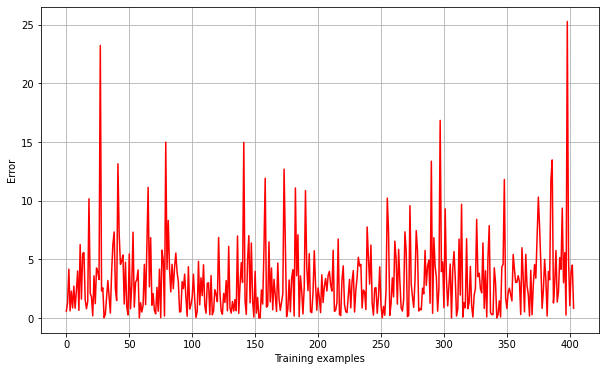

Training Error: 20.844663269014326


In [ ]:
train_pred = model1.predict(X_train)

plt.figure(figsize=(10,6))
plt.plot(np.abs(train_pred - y_train), 'r-')
plt.xlabel('Training examples')
plt.ylabel('Error')
plt.grid()
plt.show()

print('Training Error: {}'.format(mean_squared_error(y_train, train_pred)))

# Evaluation

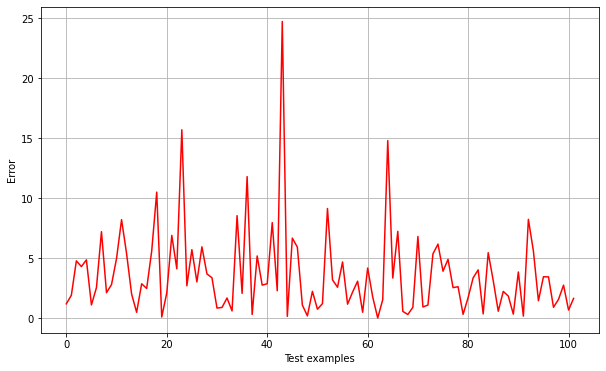

Test Error: 26.82540057393923


In [ ]:
test_pred = model1.predict(X_test)

plt.figure(figsize=(10,6))
plt.plot(np.abs(test_pred - y_test), 'r-')
plt.xlabel('Test examples')
plt.ylabel('Error')
plt.grid()
plt.show()

print('Test Error: {}'.format(mean_squared_error(y_test, test_pred)))